In [ ]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

from pathlib import Path

In [ ]:
data_path = Path('/content/drive/MyDrive/Colab_Notebooks/ARC/data/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'

training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
print(len(training_tasks), len(evaluation_tasks))

400 400


In [ ]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

# plt.figure(figsize=(5, 2), dpi=200)
# plt.imshow([list(range(10))], cmap=cmap, norm=norm)
# plt.xticks(list(range(10)))
# plt.yticks([])
# plt.show()


In [ ]:
#It extacts features from the JSON file
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

#mapping between colour names and integers
num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [ ]:
#This function is used to asses the performance of a prediction function on a given task
def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    #It calculates the number of subplots needed for visualization based on the number of training and test examples in the task.
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

        # It is used to compare the ground truth output with the predictions for both training and test examples in a task

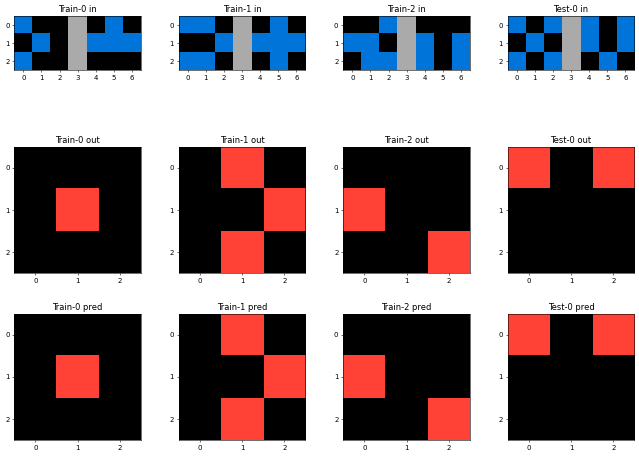

In [ ]:
def task_train(x):
    blue, red = color2num["blue"], color2num["red"]

    def split_by_gray_line(arr):
        H, W = arr.shape
        gray = color2num["gray"]
        Y = [-1]
        for y in range(H):
            if (arr[y, :]==gray).all():
                Y.append(y)
        Y.append(H)
        X = [-1]
        for x in range(W):
            if (arr[:, x]==gray).all():
                X.append(x)
        X.append(W)
        res = [[arr[y1+1:y2, x1+1:x2] for x1, x2 in zip(X[:-1], X[1:])] for y1, y2 in zip(Y[:-1], Y[1:])]
        return res

    def change_color(arr, d):
        res = arr.copy()
        for k, v in d.items():
            res[arr==k] = v
        return res

    x_split = split_by_gray_line(x)
    assert len(x_split)==1
    assert len(x_split[0])==2
    x1, x2 = x_split[0]
    y = x1 & x2
    y = change_color(y, {blue: red})
    return y

task = get_data(str(training_path / training_tasks[5]))
check(task, task_train)